In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import metricas_plots

In [2]:
importlib.reload(metricas_plots)
from metricas_plots import PlotsMetricas
p = PlotsMetricas()

### DataPrep inicial

In [3]:
dados_raw = pd.read_csv("dados/ariel_completo.csv.gz", compression="gzip")
print(dados_raw.shape)

(137724, 30)


In [4]:
dados_limpos = dados_raw[
    ['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
     'mass_log10', 'Av', 'oiii_5007_ew', 'oiii_5007_flux', 'nii_6584_ew',
     'nii_6584_flux', 'halpha_ew', 'halpha_flux', 'hbeta_ew', 'hbeta_flux']].copy()
dados_limpos = dados_limpos.dropna()
print(dados_limpos.columns, "\n", dados_limpos.shape)

Index(['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
       'mass_log10', 'Av', 'oiii_5007_ew', 'oiii_5007_flux', 'nii_6584_ew',
       'nii_6584_flux', 'halpha_ew', 'halpha_flux', 'hbeta_ew', 'hbeta_flux'],
      dtype='str') 
 (135862, 18)


### Tratando linhas sem medição

In [5]:
linhas = ['nii_6584_flux', 'halpha_flux', 'oiii_5007_flux', 'hbeta_flux']
larguras = [l.replace('flux', 'ew') for l in linhas]

dados_limpos["oiii_5007_ew_miss"] = np.where(dados_limpos['oiii_5007_ew'] < 0, 1, 0)
dados_limpos["nii_6584_ew_miss"] = np.where(dados_limpos['nii_6584_ew'] < 0, 1, 0)
dados_limpos["halpha_ew_miss"] = np.where(dados_limpos['halpha_ew'] < 0, 1, 0)
dados_limpos["hbeta_ew_miss"] = np.where(dados_limpos['hbeta_ew'] < 0, 1, 0)
dados_limpos.tail()

,fileid,RA,Dec,z,atflux,atmass,aZflux,aZmass,mass_log10,Av,...,nii_6584_ew,nii_6584_flux,halpha_ew,halpha_flux,hbeta_ew,hbeta_flux,oiii_5007_ew_miss,nii_6584_ew_miss,halpha_ew_miss,hbeta_ew_miss
137719,22735370992,127.255827,17.706104,0.088792,9.518579,9.767818,-0.460162,-0.148713,9.834210,0.4468,...,3.099,49.976002,8.572000,137.505005,1.928,31.329000,0,0,0,0
137720,227153726640,126.770680,17.736030,0.057688,9.141241,9.834117,-0.118837,-0.359741,9.044979,0.1756,...,4.833,35.555000,29.541000,216.186005,6.812,69.386002,0,0,0,0
137721,22735370953,127.439092,17.763240,0.056286,8.572157,9.170356,-0.712194,-1.087279,9.089071,0.6900,...,13.374,246.149002,67.269997,1231.686035,11.973,318.592987,0,0,0,0
137722,227353709178,126.768430,17.795689,0.055959,9.038992,9.227427,-0.431030,-0.233626,9.418041,0.8138,...,4.047,97.778999,10.936000,262.848999,2.521,65.037003,0,0,0,0
137723,227353709144,126.898010,17.918511,0.059016,9.886442,10.001024,-0.528954,-0.094116,10.304822,0.5137,...,7.869,477.445007,14.962000,902.971008,2.613,145.227005,0,0,0,0


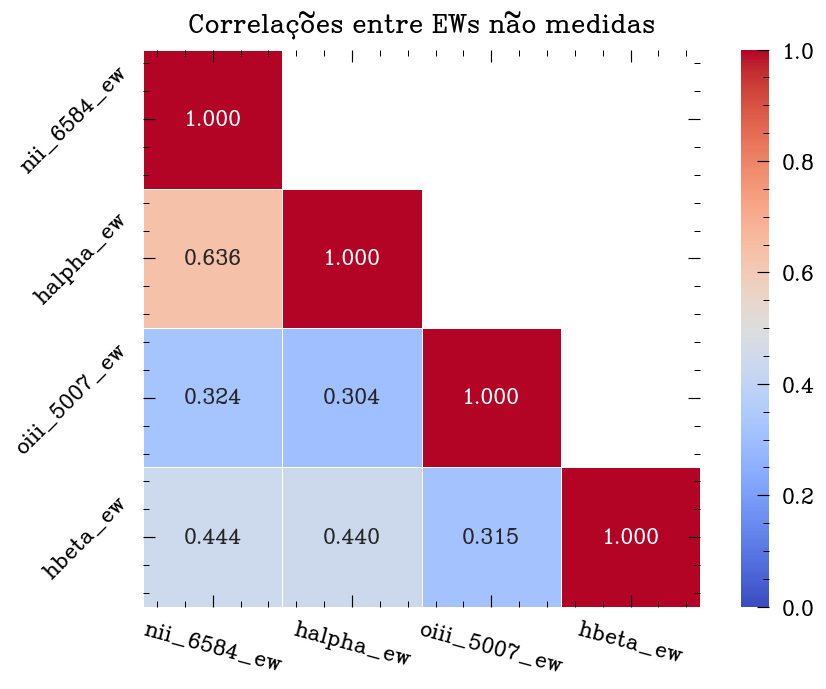

In [12]:
correlacoes = dados_limpos.loc[:, [l+"_miss" for l in larguras]].corr()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p.plot_corr(correlacoes, ax, larguras, 'Correlações entre EWs não medidas')
plt.tight_layout()
plt.show()

### Criando colunas com log10

In [7]:
# Fluxos
dados_limpos["nii_6584_flux_log10"] = np.log10(dados_limpos["nii_6584_flux"])
dados_limpos["halpha_flux_log10"] = np.log10(dados_limpos["halpha_flux"])
dados_limpos["oiii_5007_flux_log10"] = np.log10(dados_limpos["oiii_5007_flux"])
dados_limpos["hbeta_flux_log10"] = np.log10(dados_limpos["hbeta_flux"])

# Larguras equivalentes
dados_limpos["nii_6584_ew_log10"] = np.log10(dados_limpos["nii_6584_ew"])
dados_limpos["halpha_ew_log10"] = np.log10(dados_limpos["halpha_ew"])
dados_limpos["oiii_5007_ew_log10"] = np.log10(dados_limpos["oiii_5007_ew"])
dados_limpos["hbeta_ew_log10"] = np.log10(dados_limpos["hbeta_ew"])

# Razões pré-calculadas para BPT e WHAN
dados_limpos["nii_halpha_ew"] = dados_limpos["nii_6584_ew_log10"] - dados_limpos["halpha_ew_log10"]
dados_limpos["oiii_hbeta_ew"] = dados_limpos["oiii_5007_ew_log10"] - dados_limpos["hbeta_ew_log10"]
dados_limpos["nii_halpha_flux"] = dados_limpos["nii_6584_flux_log10"] - dados_limpos["halpha_flux_log10"]
dados_limpos["oiii_hbeta_flux"] = dados_limpos["oiii_5007_flux_log10"] - dados_limpos["hbeta_flux_log10"]

In [8]:
print(dados_limpos.columns)

Index(['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
       'mass_log10', 'Av', 'oiii_5007_ew', 'oiii_5007_flux', 'nii_6584_ew',
       'nii_6584_flux', 'halpha_ew', 'halpha_flux', 'hbeta_ew', 'hbeta_flux',
       'oiii_5007_ew_miss', 'nii_6584_ew_miss', 'halpha_ew_miss',
       'hbeta_ew_miss', 'nii_6584_flux_log10', 'halpha_flux_log10',
       'oiii_5007_flux_log10', 'hbeta_flux_log10', 'nii_6584_ew_log10',
       'halpha_ew_log10', 'oiii_5007_ew_log10', 'hbeta_ew_log10',
       'nii_halpha_ew', 'oiii_hbeta_ew', 'nii_halpha_flux', 'oiii_hbeta_flux'],
      dtype='str')


In [9]:
dados = dados_limpos.drop([linhas+larguras+[l+'_miss' for l in larguras]][0], axis=1).dropna()
print(dados.shape)
print(dados_limpos.shape[0] - dados.shape[0]) # Qtde de missings

(125819, 22)
10043


In [10]:
dados.columns = [c.replace('_log10', '') for c in dados.columns]
print(dados.columns)

Index(['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
       'mass', 'Av', 'nii_6584_flux', 'halpha_flux', 'oiii_5007_flux',
       'hbeta_flux', 'nii_6584_ew', 'halpha_ew', 'oiii_5007_ew', 'hbeta_ew',
       'nii_halpha_ew', 'oiii_hbeta_ew', 'nii_halpha_flux', 'oiii_hbeta_flux'],
      dtype='str')


In [11]:
dados.to_csv("dados/ariel_limpo_log10.csv.gz", compression="gzip", index=False)
dados = pd.read_csv("dados/ariel_limpo_log10.csv.gz", compression="gzip")
print(dados.shape)

(125819, 22)
